In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow pillow matplotlib

In [ ]:
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0


Found existing installation: tensorflow 2.17.1
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 721, in uninstall
    uninstalled_pathset = UninstallPathSet.from_dist(dist)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 518, in from_dist
    paths_to_remove.add(path)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 328, in add
    if not os.path.exists(path):
  File "/usr/lib/python3.10/genericpath.py", line 19, in exists
    os.stat(path)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent

Testing image: /content/test1.jpg


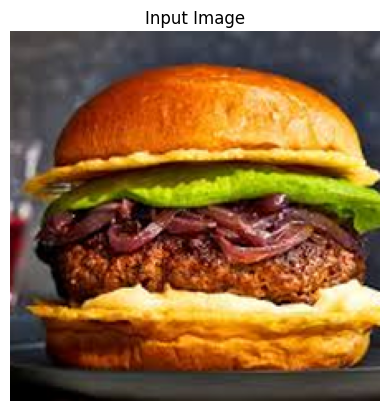

1/1 [==============================] - 1s 1s/step
Class: 1 BURGER
Confidence Score: 0.9978709


In [6]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt  # Library for displaying images

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
with open("/content/labels.txt", "r") as file:
    class_names = file.readlines()

# Function to predict the class of an image
def predict_image(image_path):
    try:
        # Open and preprocess the image
        image = Image.open(image_path).convert("RGB")
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

        # Display the image
        plt.imshow(image)
        plt.axis("off")  # Hide axes for cleaner display
        plt.title("Input Image")
        plt.show()

        # Turn the image into a numpy array
        image_array = np.asarray(image)

        # Normalize the image
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

        # Prepare the array for prediction
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        data[0] = normalized_image_array

        # Predict the class using the model
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]
        confidence_score = prediction[0][index]

        # Print prediction and confidence score
        print("Class:", class_name.strip())  # Remove any trailing newlines
        print("Confidence Score:", confidence_score)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Path to the single image
image_path = "/content/test1.jpg"  # Replace with the path to your image

# Predict for the single image
print(f"Testing image: {image_path}")
predict_image(image_path)
